In [29]:
import cv2 as cv
import numpy as np
import pyautogui


cam = cv.VideoCapture(0)

lower_blue = np.array([110,50,50])#blue for corsor
upper_blue = np.array([130,255,255])


lower_red = np.array([160,50,50])#red left click
upper_red = np.array([180,255,255])


lower_yellow = np.array([23,41,133])#yellow for right
upper_yellow = np.array([60,150,255])


while(True):        
        ret,frame = cam.read()
        frame = cv.flip(frame,1)
        

        #Smoothen the image
        image_smooth = cv.GaussianBlur(frame,(7,7),0)

        #Define ROI
        mask = np.zeros_like(frame)
        mask[100:350,100:350] = [255,255,255]
        image_roi = cv.bitwise_and(image_smooth,mask)
        cv.rectangle(frame,(50,50),(350,350),(0,0,255),2)
        cv.line(frame,(150,50),(150,350),(0,0,255),1)
        cv.line(frame,(250,50),(250,350),(0,0,255),1)
        cv.line(frame,(50,150),(350,150),(0,0,255),1)
        cv.line(frame,(50,250),(350,250),(0,0,255),1)

        #Threshold the image for blue color
        image_hsv = cv.cvtColor(image_roi,cv.COLOR_BGR2HSV)
        image_threshold = cv.inRange(image_hsv,lower_blue,upper_blue)

        #Find Contours
        contours,heirarchy = cv.findContours(image_threshold, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

        #Find the index of the largest contour
        if(len(contours)!=0):
                areas = [cv.contourArea(c)  for c in contours]
                max_index = np.argmax(areas)
                cnt = contours[max_index]
 
                #pointer on video
                M = cv.moments(cnt)
                if(M['m00']!=0):
                        cx = int(M['m10']/M['m00'])
                        cy = int(M['m01']/M['m00'])
                        cv.circle(frame, (cx,cy),4,(0,255,0),-1)

                        # Cursor Motion
                        if cx < 150:
                                dist_x = -20
                        elif cx > 250:
                                dist_x = 20
                        else:
                                dist_x = 0

                        if cy < 150:
                                dist_y = -20
                        elif cy > 250:
                                dist_y = 20
                        else:
                                dist_y = 0
                        pyautogui.FAILSAFE = False
                        pyautogui.moveRel(dist_x,dist_y,duration=0.25)

                # Check for left click
                image_threshold_red = cv.inRange(image_hsv, lower_red, upper_red)
                contours_red,heirarchy = cv.findContours(image_threshold_red,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
                                                            

                if(len(contours_red)!=0):
                        pyautogui.click()
                        cv.waitKey(1000)


                
                # Check for Right click
                image_threshold_yellow = cv.inRange(image_hsv, lower_yellow, upper_yellow)
                contours_yellow,heirarchy = cv.findContours(image_threshold_yellow,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)


                if(len(contours_yellow)!=0):
                        pyautogui.click(button='right')
                        cv.waitKey(1000)                
                                        

        cv.imshow('Frame',frame)
        if cv.waitKey(10) == 27:
                break


cam.release()
cv.destroyAllWindows()

In [32]:
import cv2 as cv
import numpy as np
import pyautogui
import time
import matplotlib.pyplot as plt

cam = cv.VideoCapture(0)

lower_blue = np.array([110,50,50])#blue for corsor
upper_blue = np.array([130,255,255])


lower_red = np.array([160,50,50])#red left click
upper_red = np.array([180,255,255])


lower_yellow = np.array([23,41,133])#yellow for right
upper_yellow = np.array([60,150,255])

old_time=0
new_time=0
i=0
Fps_average=0
array=[]
while(True):        
        ret,frame = cam.read()
        frame = cv.flip(frame,1)
        

        #Smoothen the image
        image_smooth = cv.GaussianBlur(frame,(7,7),0)

        #Define ROI
        mask = np.zeros_like(frame)
        mask[100:350,100:350] = [255,255,255]
        image_roi = cv.bitwise_and(image_smooth,mask)
        cv.rectangle(frame,(50,50),(350,350),(0,0,255),2)
        cv.line(frame,(150,50),(150,350),(0,0,255),1)
        cv.line(frame,(250,50),(250,350),(0,0,255),1)
        cv.line(frame,(50,150),(350,150),(0,0,255),1)
        cv.line(frame,(50,250),(350,250),(0,0,255),1)

        #Threshold the image for blue color
        image_hsv = cv.cvtColor(image_roi,cv.COLOR_BGR2HSV)
        image_threshold = cv.inRange(image_hsv,lower_blue,upper_blue)

        #Find Contours
        contours,heirarchy = cv.findContours(image_threshold, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

        #Find the index of the largest contour
        if(len(contours)!=0):
                areas = [cv.contourArea(c)  for c in contours]
                max_index = np.argmax(areas)
                cnt = contours[max_index]
 
                #pointer on video
                M = cv.moments(cnt)
                if(M['m00']!=0):
                        cx = int(M['m10']/M['m00'])
                        cy = int(M['m01']/M['m00'])
                        cv.circle(frame, (cx,cy),4,(0,255,0),-1)

                        # Cursor Motion
                        if cx < 150:
                                dist_x = -20
                        elif cx > 250:
                                dist_x = 20
                        else:
                                dist_x = 0

                        if cy < 150:
                                dist_y = -20
                        elif cy > 250:
                                dist_y = 20
                        else:
                                dist_y = 0
                        pyautogui.FAILSAFE = False
                        pyautogui.moveRel(dist_x,dist_y,duration=0.25)

                # Check for left click
                image_threshold_red = cv.inRange(image_hsv, lower_red, upper_red)
                contours_red,heirarchy = cv.findContours(image_threshold_red,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
                                                            

                if(len(contours_red)!=0):
                        pyautogui.click()
                        cv.waitKey(1000)


                
                # Check for Right click
                image_threshold_yellow = cv.inRange(image_hsv, lower_yellow, upper_yellow)
                contours_yellow,heirarchy = cv.findContours(image_threshold_yellow,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)


                if(len(contours_yellow)!=0):
                        pyautogui.click(button='right')
                        cv.waitKey(1000)                
                                        

        new_time=time.time()
        
        Fps = new_time-old_time
        Fps=1/Fps
        Fps=int(Fps)
        i+=1
        Fps_average=(Fps_average*(i-1)+Fps)/i
        array.append(Fps)
        print(Fps_average)
        
        
        old_time=new_time
        cv.imshow('Frame',frame)
        if cv.waitKey(10) == 27:
                break


cam.release()
cv.destroyAllWindows()

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.7333333333333334
4.3125
4.705882352941177
6.777777777777778
7.0
8.15
8.523809523809524
9.5
9.652173913043478
10.5
10.76
11.461538461538462
11.518518518518519
11.928571428571429
12.137931034482758
12.966666666666667
13.096774193548388
13.78125
13.666666666666666
14.088235294117647
14.057142857142857
14.472222222222221
14.64864864864865
14.947368421052632
15.025641025641026
15.325
15.268292682926829
15.5
15.511627906976743
15.977272727272727
15.977777777777778
16.282608695652176
16.234042553191493
16.58333333333334
16.469387755102044
16.78
16.745098039215687
17.01923076923077
17.0
17.24074074074074
17.21818181818182
17.321428571428573
17.245614035087723
17.48275862068966
17.4406779661017
17.78333333333334
17.754098360655743
17.95161290322581
17.90476190476191
18.062500000000004
17.969230769230773
18.121212121212125
18.1044776119403
18.19117647058824
18.173913043478265
18.38571428571429
18.35211267605634
18.500000000000004
18.41095

Text(0, 0.5, 'avarage frames per second')

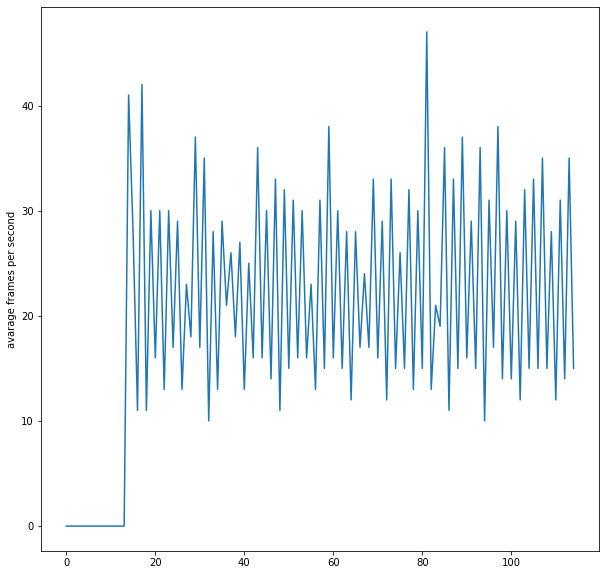

In [33]:
t=np.arange(0,i)
plt.rcParams["figure.figsize"]=10,10
plt.plot(t,array)
plt.ylabel("avarage frames per second")

In [ ]:
lower_orange = np.array([110,50,50])#blue for corsor
upper_orange = np.array([130,255,255])


lower_green = np.array([160,50,50])#red left click
upper_green = np.array([180,255,255])


lower_violet = np.array([23,41,133])#yellow for right
upper_violet = np.array([40,150,255])